In [1]:
%matplotlib inline
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display
from matplotlib.pyplot import figure, imshow, subplot, show

img_height=128
img_width=416
ckpt_file = 'models/model-190532'
#fh = open('misc/sample.png')#, 'r')
I = pil.open('misc/sample.png')
I = I.resize((img_width, img_height), pil.Resampling.LANCZOS)
I = np.array(I)

C:\Users\hoa\AppData\Local\Temp\ipykernel_7380\1003876578.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  I = I.resize((img_width, img_height), pil.ANTIALIAS)


In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

c:\Users\hoa\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [3]:
saver = tf.compat.v1.train.Saver([var for var in tf.compat.v1.model_variables()]) 
with tf.compat.v1.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

INFO:tensorflow:Restoring parameters from models/model-190532


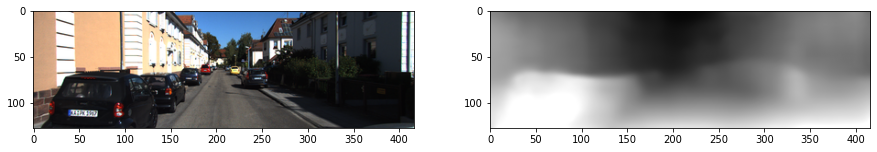

In [4]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))